# Ford Gobike Exploration
## by Rahal Mehdi Abdelaziz

## Investigation Overview

> In this investigation, I wanted to explore when are most trips taken in term of time of day, day of week or month, I also wanted to explore trip duration regarding the same last time features, and see if it is influenced by if a user is a member or a casual customer.

## Dataset Overview

> There are 4702822 trip on the dataset with 13 features ( trip_duration, started_at, ended_at, start_station_id, start_station_name, start_lat, start_lng, start_lng, end_station_id, end_station_name, end_lat, end_lng, bike_ride_id, member_casual ) most variables are object, the trip duration is an 'int' those related to start and end position are 'float', the start time and the end time are 'datetime', and member_casual wich is a categorical variable.

**Nb :** The exploration will be done regarding time of day, day of week and the month> 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
dtype = {'member_casual': 'category'}            # Set member_casual as a categorical variable
parse_dates = ['started_at', 'ended_at']         # Set date variable as a datetime datatype 
df =pd.read_csv('ford_gobike_system.csv', dtype=dtype, parse_dates=parse_dates)   # import the csv respecting datatypes

In [3]:
df['month'] = pd.to_datetime(df['started_at']).dt.to_period('M')
df['weekday'] = df['started_at'].dt.day_name()
df['daytime'] = df['started_at'].dt.hour

df['weekday'] = pd.Categorical(df['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

**Nb :** The exploration will be done regarding time of day, day of week and the month

## Total number of trip 

> Periods with the most number of trips:

* Day of Time : from 08:00 to 10:00 and from 16:00 to 19:00.
* Day of Week : Tuesday, Wednesday ,Thursday and Friday, Monday is slightly lower and the weekend have a low total number of trip.
* Months : February 2020 is the with the highest total number.

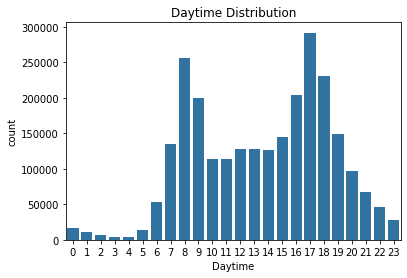

In [4]:
base_color = sb.color_palette()[0];

######
sb.countplot(data=df, x='daytime', color = base_color);
plt.xlabel('Daytime');
plt.title('Daytime Distribution');


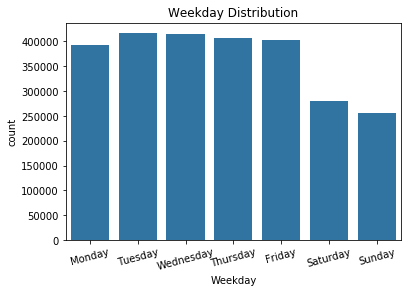

In [5]:
sb.countplot(data=df, x='weekday', color=base_color);
plt.xticks(rotation = 15);
plt.xlabel('Weekday');
plt.title('Weekday Distribution');

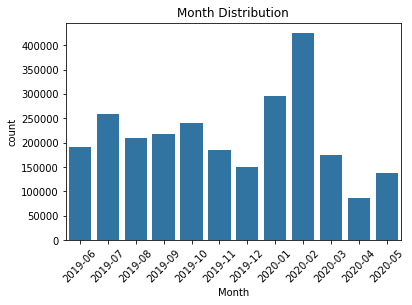

In [6]:
sb.countplot(data=df, x ='month', color=base_color);
plt.xticks(rotation = 45);
plt.xlabel('Month');
plt.title('Month Distribution');

## The average trip duration 

> The average trip duration is about 10 minutes, I refered to the median due to outliers.
<br> The average is higher on the weekend ( regarding day of week) and the last two months (regarding months) wich coincide with the corona virus pandemic.
<br> Another observation is the negative correlation between the trip duration average and the total trip count.

In [7]:
def exp_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.log(x)
    else:
        return np.exp(x) 
    
    
# make an exponential transformation for the trip duration values
df['trip_duration_exp'] = df['trip_duration'].apply(exp_trans);

# Make a function to set the yticks
def duration_yticks():
    duration_labels = ['1mn', '10mn','2h30mn', '1j', '10j'];
    duration_ticks =[1,10,150 ,1440, 14400];        ####
    plt.yticks(exp_trans(np.array(duration_ticks)), duration_labels);
    plt.ylabel("Trip Duration");
    

    


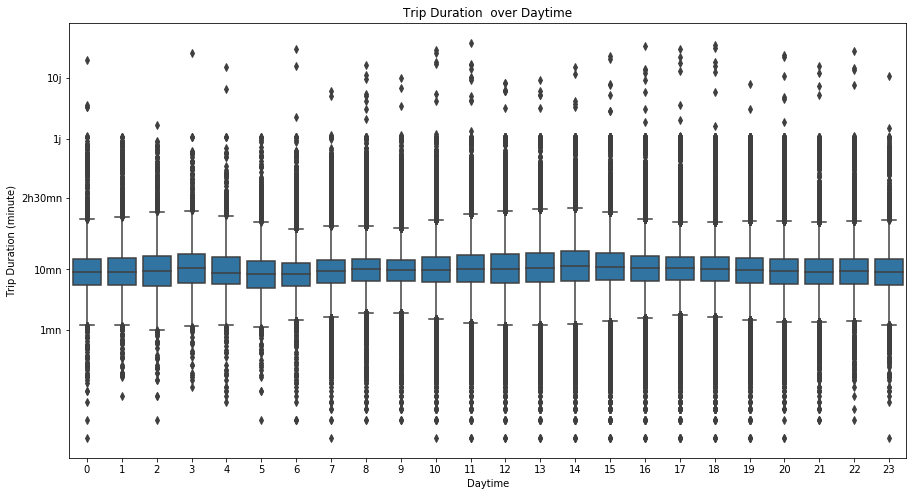

In [8]:
plt.figure(figsize=(15,8))
sb.boxplot(data = df, x = 'daytime', y = 'trip_duration_exp', color=base_color);
# set y ticks and labels
duration_yticks();
plt.xlabel('Daytime');
plt.ylabel('Trip Duration (minute)');
plt.title('Trip Duration  over Daytime'); 

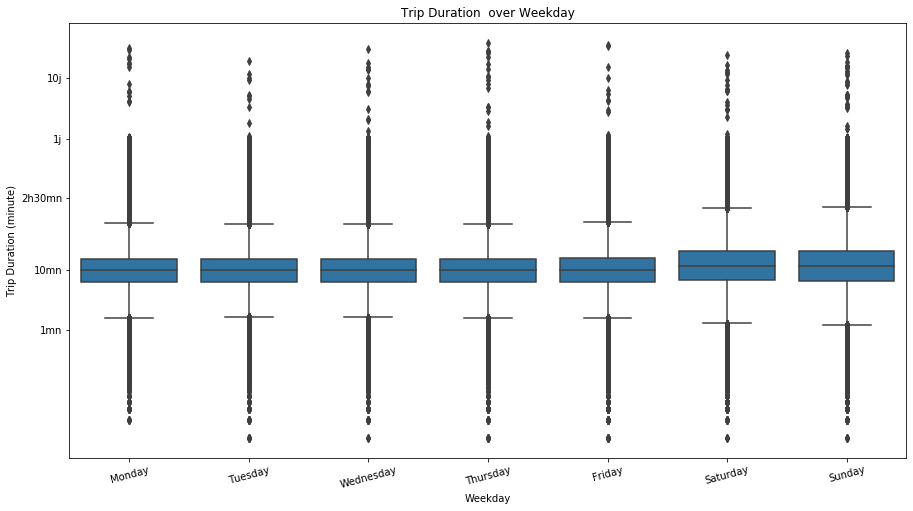

In [9]:
plt.figure(figsize=(15,8))
sb.boxplot(data = df, x = 'weekday', y = 'trip_duration_exp', color=base_color);
# set y ticks and labels
duration_yticks();

plt.xticks(rotation = 15);
plt.xlabel('Weekday');
plt.ylabel('Trip Duration (minute)');
plt.title('Trip Duration  over Weekday');

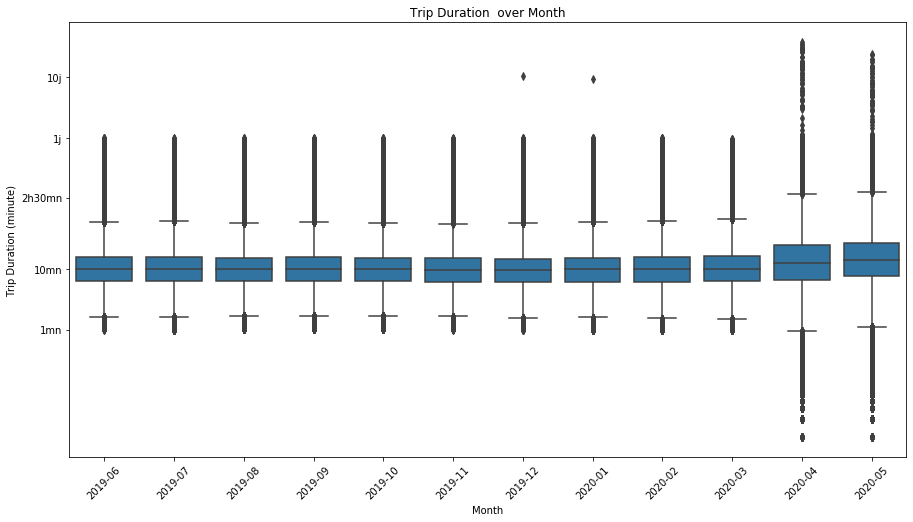

In [10]:
plt.figure(figsize=(15,8))
sb.boxplot(data = df, x = 'month', y = 'trip_duration_exp', color=base_color);
# set y ticks and labels
duration_yticks();

plt.xticks(rotation = 45);
plt.xlabel('Month');
plt.ylabel('Trip Duration (minute)');
plt.title('Trip Duration  over Month'); 

## Total number of trip 

The total nuber of trip is bigger for members for each kind of period of time

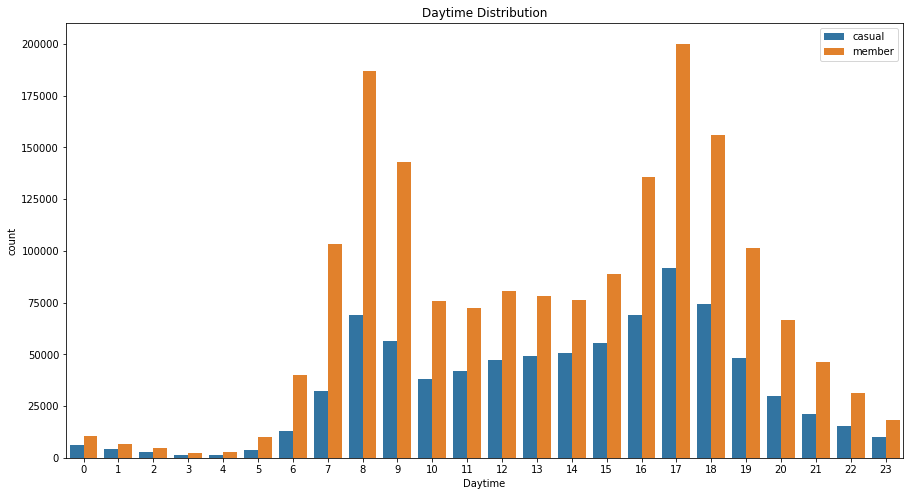

In [11]:
plt.figure(figsize=(15,8))
sb.countplot(data=df, x='daytime', hue='member_casual' );
plt.xlabel('Daytime');
plt.title('Daytime Distribution')
plt.legend(title=None);

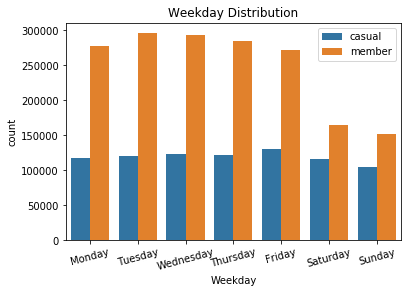

In [12]:
sb.countplot(data=df, x='weekday', hue='member_casual');
plt.xticks(rotation = 15);
plt.xlabel('Weekday')
plt.title('Weekday Distribution')
plt.legend(title=None);

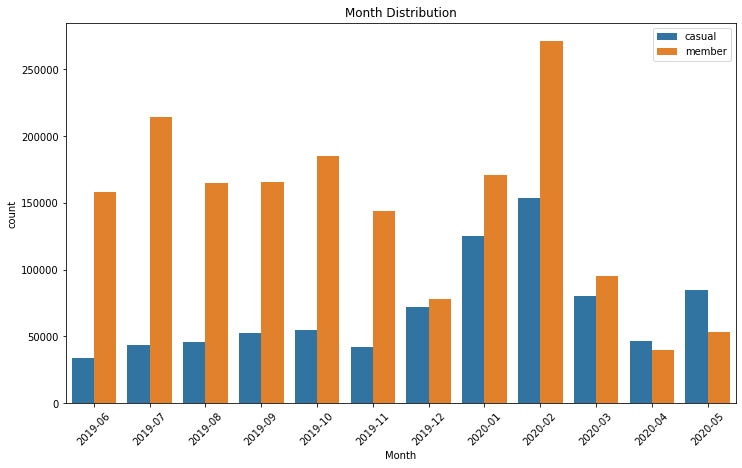

In [13]:
plt.figure(figsize=(12,7))
sb.countplot(data=df, x ='month', hue='member_casual');
plt.xticks(rotation = 45);
plt.xlabel('Month')
plt.title('Month Distribution')
plt.legend(title=None);

## Trip Duration by Customer type

> Casual customer are more susceptible to have a long trip.




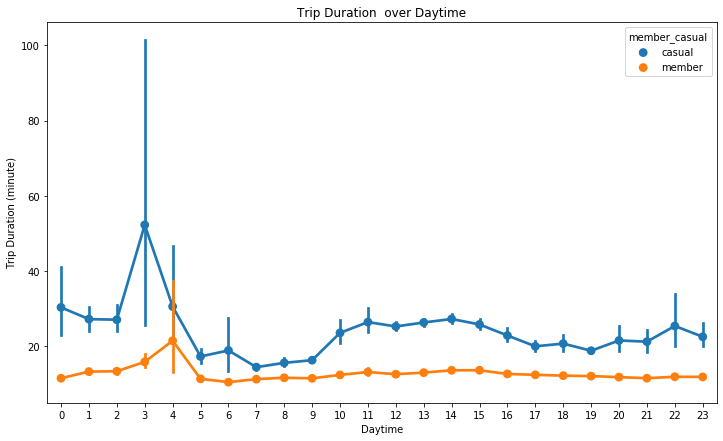

In [14]:
plt.figure(figsize=(12,7))

sb.pointplot(data = df, x = 'daytime', y = 'trip_duration', hue='member_casual');
plt.xlabel('Daytime');
plt.ylabel('Trip Duration (minute)');
plt.title('Trip Duration  over Daytime');

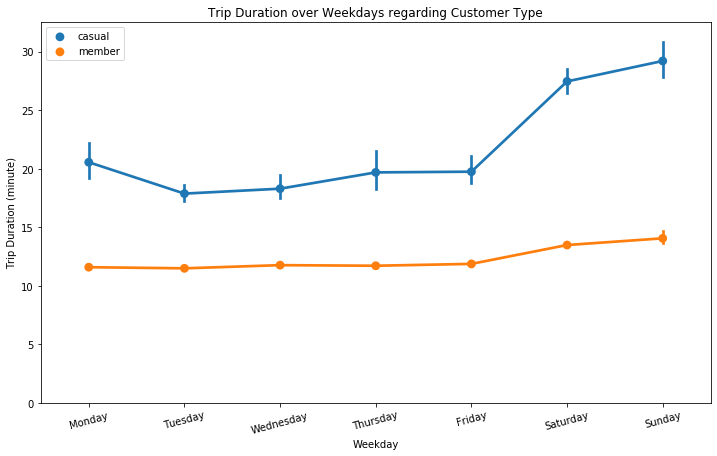

In [15]:
####### Weekday
plt.figure(figsize=(12,7))
sb.pointplot(data=df, x='weekday', y='trip_duration', hue='member_casual');
plt.xticks(rotation = 15);
plt.legend(loc=2);
plt.xlabel('Weekday');
plt.ylabel('Trip Duration (minute)');
plt.title('Trip Duration over Weekdays regarding Customer Type');
plt.ylim(0,32.5)
plt.show()

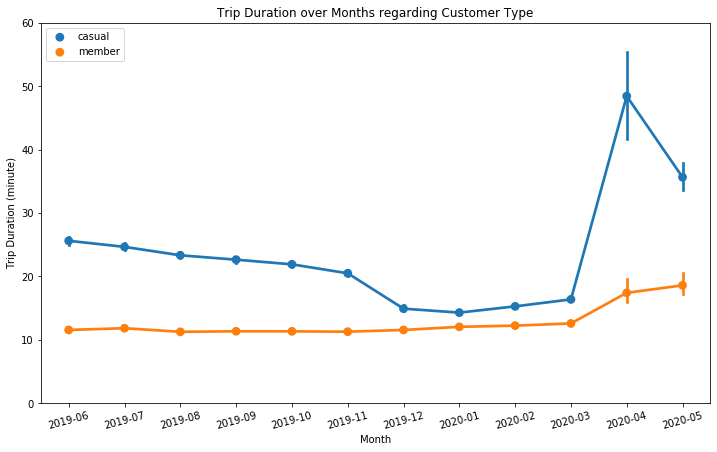

In [4]:
####### Month
plt.figure(figsize=(12,7))
sb.pointplot(data=df, x='month', y='trip_duration', hue='member_casual');
plt.xticks(rotation = 15);
plt.legend(loc=2);
plt.xlabel('Month');
plt.ylabel('Trip Duration (minute)');
plt.title('Trip Duration over Months regarding Customer Type');
plt.ylim(0,60)
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert GoBike_Presentation.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!